In [1]:
# default_exp datasets.generators

In [2]:
# hide
%load_ext autoreload
%autoreload 2

In [3]:
# hide
from nbdev import *

In [4]:
# exporti
import numpy as np
from pandas import DataFrame
from pathlib import Path
import json
from skimage.draw import random_shapes
from random import randint
import matplotlib.pyplot as plt
from skimage.draw import (ellipse)

In [5]:
#exporti
from skimage.draw import (rectangle, rectangle_perimeter, line)
from skimage.io import imsave

# Helpers for Dataset Generation

In [6]:
# hide
import tempfile
from typing import Tuple, List
tmp_dir = tempfile.TemporaryDirectory()
tmp_dir.name

'/tmp/tmptbtvpjdf'

In [7]:
# hide
f_path = Path(tmp_dir.name) / 'test.csv'
f_path

Path('/tmp/tmptbtvpjdf/test.csv')

In [8]:
# hide

import pandas as pd

DataFrame({'a': [4], 'b': 5}).to_csv(f_path, index=False)
pd.read_csv(f_path)

,a,b
0,4,5


## Display image

In [9]:
# export
def show_img(img):
    """
    Display a numpy array as a image
    """
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 3))
    ax.imshow(img)

In [10]:
# export
def save_img(path, name, img):
    """
    Save a numpy array as a image
    """
    image = img.astype(np.uint8)
    filename = path / (name + ".jpg")

    imsave(filename, image, check_contrast=False)

In [11]:
# export
def save_img_annotations(path, annotations, name="annotations"):
    """
    Helper to save the annotations of a image into the desired file
    """
    filename = path / (name + ".json")

    with open(filename, "w") as file:
        json.dump(annotations, file)

## Create images

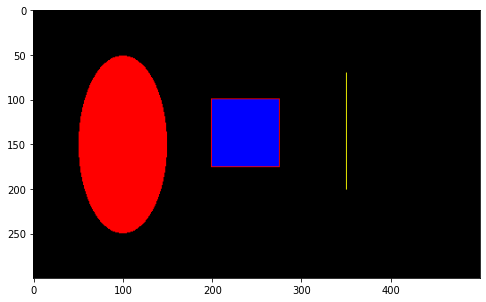

In [12]:
from skimage.draw import (ellipse_perimeter)

# change from zeros to ones to have a white bg.
img = np.zeros((300, 500, 3), dtype=np.double)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))

# draw ellipse with perimeter
rr_ellipse, cc_ellipse = ellipse(150, 100, 100, 50)
rr_ellipse_p, cc_ellipse_p = ellipse_perimeter(150, 100, 100, 50)
img[rr_ellipse, cc_ellipse, :] = (1, 0, 0)
img[rr_ellipse_p, cc_ellipse_p, :] = (0, 0, 0)

# draw square
rr_square, cc_square = rectangle(start=(100, 200), extent=(75, 75))
rr_square_p, cc_square_p = rectangle_perimeter(start=(100, 200), extent=(75, 75))
img[rr_square, cc_square, :] = (0, 0, 1)
img[rr_square_p, cc_square_p, :] = (1, 0, 0)

# draw line

rr_line, cc_line = line(70, 350, 200, 350)
img[rr_line, cc_line, :] = (1, 1, 0)

# display img
ax.imshow(img)

In [13]:
# export
def draw_grid(im=None, size=(100, 100), n_hlines=10, n_vlines=10, black=True):
    """
    Will draw the default background with a grid system.

    im  np.array:
        Existing image, if None will create one

    size  (int, int):
        Height and width, respectively

    n_hlines  int:
        Number of horizontal lines

    n_vlines  int:
        Number of vertial lines

    black  bool:
        If true, the background will be black

    """
    height, width = size
    img = im
    color = (0, 0, 0)
    line_color = (1, 1, 1)
    if not black:
        color = (1, 1, 1)
        line_color = (0, 0, 0)

    if im is None:
        img = np.full((height, width, 3), dtype=np.double, fill_value=color)

    for lines in range(n_hlines):
        y = height * lines * (1 / n_hlines)
        y = int(y)
        rr_line, cc_line = line(0, y, width - 1, y)
        img[rr_line, cc_line, :] = line_color

    for lines in range(n_vlines):
        x = width * lines * (1 / n_vlines)
        x = int(x)
        rr_line, cc_line = line(x, 0, x, height - 1)
        img[rr_line, cc_line, :] = line_color

    return img

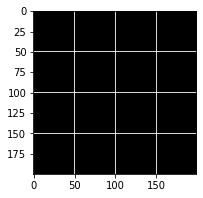

In [14]:
img = draw_grid(size=(200, 200), n_hlines=4, n_vlines=4)
show_img(img)

In [15]:
# export

def draw_bbox(rect, rect_dimensions, im=None, black=True):
    """
    Draw a Bounding Box

    rect  (int, int):
        Begining point of the retangle

    rect_dimensions  (int, int):
        Width and Height of the retangle

    im  np.array:
        Image where bbox will be draw

    black  bool:
        If true, the bbox will be black

    """
    init_x, init_y = rect
    height, width = rect_dimensions
    img = im

    if im is None:
        img = np.ones((100, 200, 3), dtype=np.double)

    color = (0, 0, 0)
    if not black:
        color = (255, 255, 255)

    rr, cc = rectangle_perimeter(start=(init_x, init_y),
                                 extent=(height, width),
                                 shape=img.shape)
    img[rr, cc, :] = color

    ex_height = height + 10
    ex_width = width + 10
    if (ex_height > len(img)):
        ex_height = len(img)

    if (ex_width > len(im[0])):
        ex_width = len(img[0])

    rr, cc = rectangle_perimeter(start=(init_x - 5, init_y - 5),
                                 extent=(ex_height, ex_width),
                                 shape=img.shape)

    img[rr, cc, :] = color

    return img

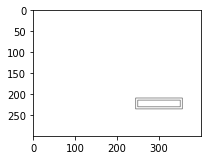

In [16]:
#img = draw_grid(size=(3400, 400),n_hlines=2, n_vlines=10, black=False)
# draw_bbox((35, 50, 200, 250), im=img, black=False)
img = np.ones((300, 400, 3), dtype=np.double)
draw_bbox((215, 250), (15, 100), im=img, black=True)

show_img(img)

In [17]:
#exporti

def xywh_to_xyxy(boxes):
    boxes = np.array(boxes)
    """Convert [x y w h] box format to [x1 y1 x2 y2] format."""
    return np.hstack((boxes[0:2], boxes[0:2] + boxes[2:4])).tolist()


def xyxy_to_xywh(boxes):
    boxes = np.array(boxes)
    """Convert [x1 y1 x2 y2] box format to [x y w h] format."""
    return np.hstack((boxes[0:2], boxes[2:4] - boxes[0:2])).tolist()

In [18]:
# hide
xyxy_to_xywh([50, 50, 150, 150])

[50, 50, 100, 100]

In [19]:
# hide
xywh_to_xyxy([50, 50, 100, 100])

[50, 50, 150, 150]

## Overlap & Intersection over Union (IOU)

In [20]:
#exporti
def bbox_intersection(b1_coords, b1_dimensions, b2_coords, b2_dimensions):
    """
    determine the (x, y)-coordinates of the intersection rectangle

    b1_coords  (int, int):
        The origin of the bbox one

    b2_coords  (int, int):
        THe origin of the bbox two

    b1_dimensions  (int, int):
        The width and heigh of bbox one

    b2_dimensions  (int, int):
        The width and heigh of bbox two
    """
    xA = max(b1_coords[0], b2_coords[0])
    yA = max(b1_coords[1], b2_coords[1])

    b1_final_x = b1_dimensions[0] + b1_coords[0]
    b1_final_y = b1_dimensions[1] + b1_coords[1]
    b2_final_x = b2_dimensions[0] + b2_coords[0]
    b2_final_y = b2_dimensions[1] + b2_coords[1]

    xB = min(b1_final_x, b2_final_x) - xA
    yB = min(b1_final_y, b2_final_y) - yA

    # compute the area of intersection rectangle
    interArea = max(0, xB) * max(0, yB)

    # compute the area of both the prediction and ground-truth
    # rectangles
    b1Area = b1_dimensions[0] * b1_dimensions[1]
    b2Area = b2_dimensions[0] * b2_dimensions[1]

    return interArea, b1Area, b2Area, (xA, yA, xB, yB)

In [21]:
#exporti
def overlap(boxA, boxA_dimensions, boxB, boxB_dimensions):
    """
    Returns the max relative overlap between two bboxs.
    """
    interArea, boxAArea, boxBArea, _ = bbox_intersection(boxA, boxA_dimensions,
                                                         boxB, boxB_dimensions)

    return max(interArea / float(boxAArea), interArea / float(boxBArea))

In [22]:
r1 = (10, 10)
r1_dimensions = (130, 130)
r2 = (50, 50)
r2_dimensions = (90, 90)
assert overlap(r1, r1_dimensions, r2, r2_dimensions) == 1
assert overlap(r2, r2_dimensions, r1, r1_dimensions) == 1

In [23]:
# export
def bb_intersection_over_union(boxA, boxA_dimensions, boxB, boxB_dimensions, verbose=False):
    interArea, boxAArea, boxBArea, _ = bbox_intersection(boxA, boxA_dimensions,
                                                         boxB, boxB_dimensions)

    iou = interArea / float(boxAArea + boxBArea - interArea)
    if verbose:
        print(f"iou: {iou: .2f}, interArea: {interArea: .2f}, "
              f"boxAArea {boxAArea: .2f}, box1Area {boxBArea: .2f}")
    return iou

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iou:  0.05, interArea:  900.00, boxAArea  10000.00, box1Area  10000.00


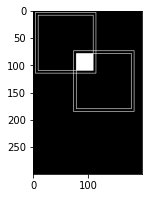

In [24]:
r1 = (10, 10)
r2 = (80, 80)
r1_dimensions = (100, 100)
r2_dimensions = (100, 100)
img = np.zeros((300, 200, 3), dtype=np.double)
draw_bbox(r1, r1_dimensions, im=img, black=False)
draw_bbox(r2, r2_dimensions, im=img, black=False)


iou = bb_intersection_over_union(r1, r1_dimensions, r2, r2_dimensions, True)
# iou = bb_intersection_over_union(r1, r2, verbose=True)
_, _, _, union = bbox_intersection(r1, r1_dimensions, r2, r2_dimensions)

init_height, init_widht, final_height, final_widht = union
extent_height = final_height - init_height
extent_width = final_widht - init_widht

rr, cc = rectangle(start=(init_height, init_widht), extent=(final_height, final_widht))

img[rr, cc, :] = (1, 1, 1)

show_img(img)

## Sample Random bbox

In [25]:
#export
def sample_bbox(bboxs=(), canvas_size=(100, 100), diag=(0.3, 0.3), ratio=(1, 1),
                max_iou=0.0, max_overlap=0.0,
                max_tries=1000, random_seed=None):
    """
    bboxs  [(x, y, x, y), ... ]:
        List of existing bboxs

    canvas_size  (int, int):
        Width and height on which to position the new bbox.

    max_iou  float [0, 1]:
        Maximum acceptable intersection over union between any two bboxs

    max_overlap  float [0, 1]:
        Maximum overlap between any two bboxs

    diag  (float, float) or float:
        Range of acceptable diagonal lenght relative to canvas diagonal

    ratio  (float, float) or float:
        Range of acceptable width / heigh ratios of the new bbox

    max_tries  int:
        Number of random tries to create a valid bbox
    """
#     for v in [diag, ratio]: assert min(v) >= 0 and max(v) <= 1, f"{v} is outside of (0, 1)"

    width, height = canvas_size
    canvas_diag = np.sqrt(width ** 2 + height**2)

    for i in range(max_tries):
        s_diag = np.random.uniform(*diag) * canvas_diag
        s_ratio = np.random.uniform(*ratio)

        # sample position fully inside canvas
        s_height = np.sqrt(s_diag ** 2 / (1. + s_ratio ** 2))
        s_width = s_ratio * s_height

        cx = np.random.randint(s_width / 2, width - s_width / 2)
        cy = np.random.randint(s_height / 2, height - s_height / 2)

        bbox_x = cx - s_width / 2
        bbox_y = cy - s_height / 2
        bbox_width = cx + s_width / 2 - bbox_x
        bbox_height = cy + s_height / 2 - bbox_y

        bbox = (bbox_x, bbox_y, bbox_width, bbox_height)
        bbox = tuple(int(v) for v in bbox)

        # check if valid iou then return
        if len(bboxs) == 0:
            return bbox
        violation = False
        for b in bboxs:
            b_x, b_y, b_width, b_heigh = b
            iou = bb_intersection_over_union((b_x, b_y), (b_width, b_heigh),
                                             (bbox_x, bbox_y), (bbox_width, bbox_height))
            b_overlap = overlap((b_x, b_y), (b_width, b_heigh),
                                (bbox_x, bbox_y), (bbox_width, bbox_height))
            if iou > max_iou or b_overlap > max_overlap:
                violation = True
        if not violation:
            return bbox

    return None

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


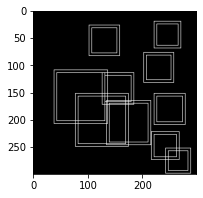

In [26]:
img = np.zeros((300, 300, 3), dtype=np.double)

bboxs: List[Tuple[int, int, int, int]] = []
for i in range(10):
    bbox: Tuple[int, int, int, int] = sample_bbox(
        bboxs=bboxs, canvas_size=(300, 300), diag=(0.1, 0.3), max_iou=0.3,
        max_overlap=0.5)

    init_x, init_y, width, heigh = bbox

    bboxs.append(bbox)
    draw_bbox((init_x, init_y), (width, heigh), im=img, black=False, )

show_img(img)

## Draw Objects inside bbox

In [27]:
#export
def draw_rectangle(im, start, dimensions, color):
    #draw = ImageDraw.Draw(im)
    #draw.rectangle(bbox, fill=color)
    rr, cc = rectangle(start=start, extent=dimensions)
    im[rr, cc, :] = color
    return im

In [28]:
#export
def draw_ellipse(im, start, dimensions, color):
    #draw = ImageDraw.Draw(im)
    #cx, cy = bbox[0] + bbox[2] / 2, bbox[1] + bbox[3]
    #draw.ellipse(bbox, fill=color)
    x, y = start
    v_radius, h_radius = dimensions

    rr, cc = ellipse(x, y, v_radius, h_radius)
    im[rr, cc, :] = color
    return im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


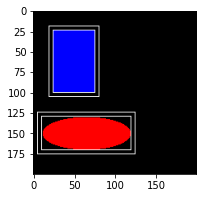

In [29]:
img = np.zeros((200, 200, 3), dtype=np.double)

ractangle_init_point = (25, 25)
rectangle_dimensions = (75, 50)
img = draw_rectangle(img, ractangle_init_point, rectangle_dimensions, (0, 0, 1))
img = draw_bbox(im=img, rect=ractangle_init_point, black=False,
                rect_dimensions=rectangle_dimensions)

ellipse_init_point = (150, 65)
ellipse_dimensions = (20, 54)

ellipse_x, ellipse_y = ellipse_init_point
ellipse_v_radius, ellipse_h_radius = ellipse_dimensions
ellipse_bbox_start = (ellipse_x - ellipse_v_radius, ellipse_y - ellipse_h_radius)
ellipse_bbox_dimensions = (ellipse_v_radius * 2, ellipse_h_radius * 2)

img = draw_ellipse(img, ellipse_init_point, ellipse_dimensions, (1, 0, 0))
img = draw_bbox(im=img, rect=ellipse_bbox_start, black=False,
                rect_dimensions=ellipse_bbox_dimensions)
show_img(img)

[179  84  26]


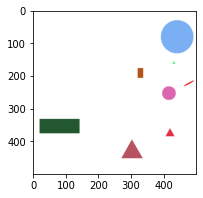

In [30]:
image, shapes = random_shapes((500, 500), 50, multichannel=True)
rr_0, rr_1 = shapes[0][1][0]
cc_0, cc_1 = shapes[0][1][1]

middle_x = int((rr_0 + rr_1) / 2)
middle_y = int((cc_0 + cc_1) / 2)

# Picking up the middle value will guarantee we get the shape color
print(image[middle_x, middle_y])

show_img(image)

## Create Object Detection Dataset

### Generic Dataset

In [31]:
# exporti
def create_simple_object_detection_dataset(path, n_samples=100, n_objects_max=3, n_objects_min=1,
                                           size=(150, 150), min_size=0.2):
    (path / 'images').mkdir(parents=True, exist_ok=True)
    (path / 'class_images').mkdir(parents=True, exist_ok=True)

    min_dimension = size[0]
    if (size[1] < size[0]):
        min_dimension = size[1]

    # create class labels
    cname = ['red', 'green', 'blue']
    color = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    for clr, name in zip(color, cname):
        img_name = f'{name}'
        img = np.ones((50, 50, 3), dtype=np.uint8)
        draw_rectangle(img, start=(0, 0), dimensions=(50, 50), color=clr)
        save_img(path / 'class_images', img_name, img)

    type_shapes = ['rectangle', 'circle', 'ellipse']
    # create images + annotations
    annotations = {}
    images = {}
    for i in range(n_samples):
        labels = []
        bboxs = []
        img_name = f'img_{i}'

        image, shapes = random_shapes(size, n_objects_max, multichannel=True,
                                      shape=type_shapes[randint(0, 2)],
                                      min_shapes=n_objects_min,
                                      min_size=min_size * min_dimension)

        for shape in shapes:
            shape_name = shape[0]
            rr_0, rr_1 = shape[1][0]
            cc_0, cc_1 = shape[1][1]
            middle_x = int((rr_0 + rr_1) / 2)
            middle_y = int((cc_0 + cc_1) / 2)

            label = (image[middle_x, middle_y].tolist(), shape_name)
            bbox = (int(cc_0), int(rr_0), int(cc_1), int(rr_1))
            labels.append(label)
            bboxs.append(bbox)

        img_file = img_name + ".jpg"
        images[img_file] = image
        save_img(path / 'images', img_name, image)
        annotations[img_file] = {'labels': labels, 'bboxs': bboxs}

    save_img_annotations(path, annotations)
    return (images, annotations)

{'labels': [([71, 71, 29], 'ellipse'), ([175, 243, 170], 'ellipse')], 'bboxs': [(11, 68, 64, 111), (84, 21, 137, 90)]}
                                                      labels  \
img_0.jpg  [[[71, 71, 29], ellipse], [[175, 243, 170], el...   
img_1.jpg  [[[17, 227, 145], circle], [[191, 153, 117], c...   
img_2.jpg                      [[[88, 127, 138], rectangle]]   
img_3.jpg                         [[[245, 29, 62], ellipse]]   
img_4.jpg                         [[[60, 26, 142], ellipse]]   

                                            bboxs  
img_0.jpg  [[11, 68, 64, 111], [84, 21, 137, 90]]  
img_1.jpg  [[1, 86, 30, 115], [71, 81, 118, 128]]  
img_2.jpg                    [[52, 96, 128, 129]]  
img_3.jpg                     [[92, 10, 133, 43]]  
img_4.jpg                      [[44, 34, 99, 97]]  


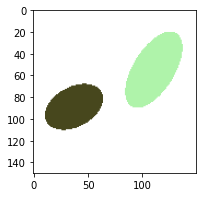

In [32]:
# hide
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
path = Path(tmp_dir.name)
images, annotations = create_simple_object_detection_dataset(path=path, n_samples=5)

show_img(images['img_0.jpg'])
print(annotations['img_0.jpg'])
print(pd.read_json(path / 'annotations.json').T)

## Specific Tasks

In [33]:
#export
def create_color_classification(path, n_samples=10, size=(150, 150)):
    """
    Helper function to color classification
    """

    images, annotations = create_simple_object_detection_dataset(path=path, n_samples=n_samples,
                                                                 size=size)

    color_img = {}
    for img in annotations:
        color_arr = []

        for shape in annotations[img]['labels']:
            color_arr.append(shape[0])

        color_img[img] = {'label': color_arr}

    save_img_annotations(path, color_img)
    return (images, color_img)

{'labels': [([71, 71, 29], 'ellipse'), ([175, 243, 170], 'ellipse')], 'bboxs': [(11, 68, 64, 111), (84, 21, 137, 90)]}


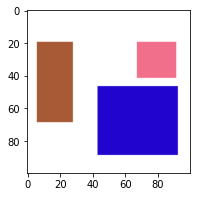

In [34]:
# hide
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
path = Path(tmp_dir.name)
images, color_imgs = create_color_classification(path=path, size=(100, 100))

show_img(images['img_0.jpg'])
print(annotations['img_0.jpg'])

In [35]:
#export
def create_shape_color_classification(path, n_samples=10, size=(150, 150)):
    """
    Helper function to shape classification
    """
    images, annotations = create_simple_object_detection_dataset(
        path, n_samples=n_samples, size=size)

    label_img = {}
    for img in annotations:
        label_arr = []

        for shape in annotations[img]['labels']:
            label_arr.append(shape)

        label_img[img] = {'label': label_arr}

    save_img_annotations(path, label_img)
    return (images, label_img)

{'labels': [([71, 71, 29], 'ellipse'), ([175, 243, 170], 'ellipse')], 'bboxs': [(11, 68, 64, 111), (84, 21, 137, 90)]}
                                                       label
img_0.jpg  [[[224, 109, 22], rectangle], [[189, 107, 39],...
img_1.jpg  [[[210, 141, 221], ellipse], [[101, 214, 182],...
img_2.jpg  [[[75, 227, 210], circle], [[138, 139, 104], c...
img_3.jpg  [[[126, 107, 165], ellipse], [[150, 63, 220], ...
img_4.jpg  [[[67, 155, 102], circle], [[211, 114, 219], c...
img_5.jpg                      [[[128, 172, 76], rectangle]]
img_6.jpg                       [[[64, 248, 59], rectangle]]
img_7.jpg                            [[[7, 3, 244], circle]]
img_8.jpg                        [[[186, 118, 154], circle]]
img_9.jpg  [[[201, 2, 28], circle], [[42, 105, 18], circl...


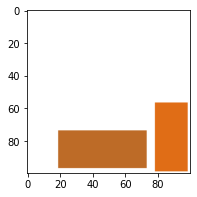

In [36]:
# hide
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
path = Path(tmp_dir.name)
images, color_imgs = create_shape_color_classification(path=path, size=(100, 100))

show_img(images['img_0.jpg'])
print(annotations['img_0.jpg'])
print(pd.read_json(path / 'annotations.json').T)

In [37]:
#export
def create_object_detection(path, n_samples=10, n_objects=1, size=(150, 150), multilabel=False):
    """
    Helper function to object detection
    """
    images, annotations = create_simple_object_detection_dataset(path=path, size=size,
                                                                 n_samples=n_samples,
                                                                 n_objects_max=n_objects)

    coords_img = {}
    for img in annotations:
        coords_arr = []

        for coord in annotations[img]['bboxs']:
            coords_arr.append(coord)

        if not multilabel:
            coords_arr = coords_arr[0]

        coords_img[img] = {'label': coords_arr}

    save_img_annotations(path, coords_img)
    return (images, coords_img)

{'label': (13, 58, 60, 105)}
                          label
img_0.jpg     [13, 58, 60, 105]
img_1.jpg      [59, 5, 118, 64]
img_2.jpg     [79, 29, 140, 90]
img_3.jpg     [16, 94, 67, 145]
img_4.jpg      [12, 40, 63, 85]
img_5.jpg    [80, 66, 148, 103]
img_6.jpg      [43, 2, 110, 69]
img_7.jpg       [14, 4, 47, 37]
img_8.jpg     [5, 15, 102, 123]
img_9.jpg    [59, 65, 114, 148]
img_10.jpg    [36, 80, 99, 143]
img_11.jpg     [2, 18, 92, 145]
img_12.jpg   [66, 39, 104, 121]
img_13.jpg    [23, 63, 82, 134]
img_14.jpg   [89, 99, 127, 133]
img_15.jpg   [72, 40, 139, 107]
img_16.jpg    [63, 23, 114, 76]
img_17.jpg  [93, 119, 128, 149]
img_18.jpg   [45, 31, 129, 105]
img_19.jpg  [116, 14, 147, 149]
img_20.jpg    [54, 96, 95, 137]
img_21.jpg  [101, 13, 149, 130]
img_22.jpg      [2, 46, 33, 77]
img_23.jpg   [76, 91, 129, 140]
img_24.jpg    [91, 22, 137, 77]
img_25.jpg    [25, 76, 70, 141]
img_26.jpg   [23, 103, 79, 136]
img_27.jpg     [26, 54, 71, 99]
img_28.jpg   [23, 102, 70, 137]
img_29.jpg 

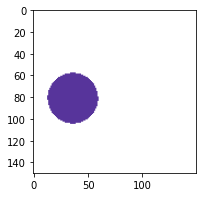

In [38]:
# hide
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
path = Path(tmp_dir.name)
images, color_imgs = create_object_detection(path=path, n_samples=50, n_objects=1)

show_img(images['img_0.jpg'])
# Label is wrong
print(color_imgs['img_0.jpg'])
print(pd.read_json(path / 'annotations.json').T)

In [39]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_base.ipynb.
Converted 00a_annotator.ipynb.
Converted 00b_mltypes.ipynb.
Converted 00c_annotation_types.ipynb.
Converted 00d_doc_utils.ipynb.
Converted 01_bbox_canvas.ipynb.
Converted 01_helpers.ipynb.
Converted 01a_datasets.ipynb.
Converted 01a_datasets_download.ipynb.


Converted 01a_datasets_factory.ipynb.
Converted 01b_dataset_video.ipynb.
Converted 01b_tutorial_image_classification.ipynb.
Converted 01c_tutorial_bbox.ipynb.
Converted 01d_tutorial_video_annotator.ipynb.
Converted 02_navi_widget.ipynb.
Converted 02a_right_menu_widget.ipynb.
Converted 02b_grid_menu.ipynb.
Converted 03_storage.ipynb.


Converted 04_bbox_annotator.ipynb.
Converted 05_image_button.ipynb.
Converted 06_capture_annotator.ipynb.
Converted 07_im2im_annotator.ipynb.
Converted 08_tutorial_road_damage.ipynb.
Converted 09_voila_example.ipynb.
Converted 11_build_annotator_tutorial.ipynb.
Converted 12_debug_utils.ipynb.
Converted 13_datasets_legacy.ipynb.


Converted 14_datasets_factory_legacy.ipynb.
Converted 15_coordinates_input.ipynb.
Converted 16_custom_buttons.ipynb.
Converted 17_annotator_explorer.ipynb.
Converted 18_bbox_trajectory.ipynb.
Converted 19_bbox_video_annotator.ipynb.
Converted 20_image_classification_user_story.ipynb.
Converted index.ipynb.
